In [1]:
from planet4 import markings
import hdbscan
plot_kwds = {'alpha' : 0.8, 's' : 50, 'linewidths':0}

In [2]:
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')
sns.set_color_codes()

In [ ]:
%matplotlib inline

In [25]:
from sklearn.datasets import make_blobs

In [91]:
X, y = make_blobs(
    n_samples=100,
    n_features=2,
    centers=3,
    cluster_std=3.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=42)

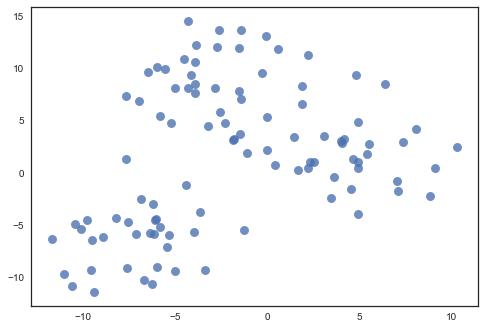

In [93]:
plt.scatter(X[:,0], X[:,1], **plot_kwds)

In [94]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(X)
color_palette = sns.color_palette('Paired', 12)
val = 0.5
cluster_colors = [color_palette[x] if x >= 0
                  else (val,val,val)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]

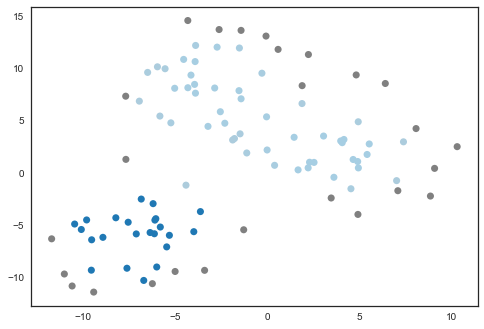

In [95]:
plt.scatter(X[:,0], X[:,1], 
            s=50, linewidth=0, c=cluster_member_colors, alpha=1)

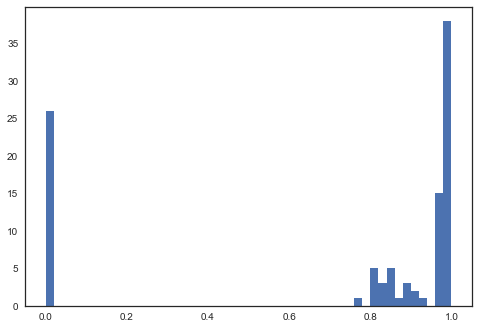

In [97]:
plt.hist(clusterer.probabilities_, bins=50);

/Users/klay6683/miniconda3/envs/stable/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


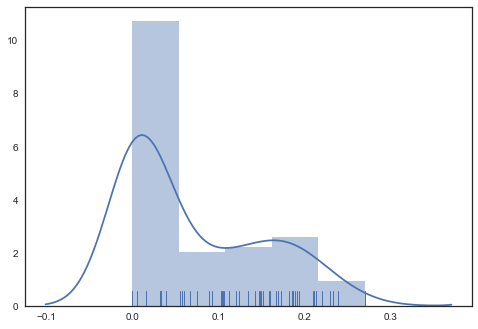

In [98]:
sns.distplot(
    clusterer.outlier_scores_[np.isfinite(clusterer.outlier_scores_)],
    rug=True)

In [143]:
threshold = pd.Series(clusterer.outlier_scores_).quantile(0.80)

In [144]:
outliers = np.where(clusterer.outlier_scores_ > threshold)[0]

In [145]:
outliers

array([ 0,  3,  9, 13, 29, 34, 38, 39, 40, 54, 57, 64, 66, 76, 78, 85, 87,
       88, 93, 94])

In [139]:
np.where(clusterer.labels_ <0 )[0]

array([ 0,  1,  3, 23, 24, 27, 29, 33, 34, 39, 40, 46, 52, 58, 59, 64, 65,
       66, 78, 83, 86, 89, 91, 93, 94, 96])

In [140]:
np.where(clusterer.probabilities_ ==0)[0]

array([ 0,  1,  3, 23, 24, 27, 29, 33, 34, 39, 40, 46, 52, 58, 59, 64, 65,
       66, 78, 83, 86, 89, 91, 93, 94, 96])

In [141]:
clusterer.probabilities_[9]

0.80810517548902239

/Users/klay6683/miniconda3/envs/stable/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


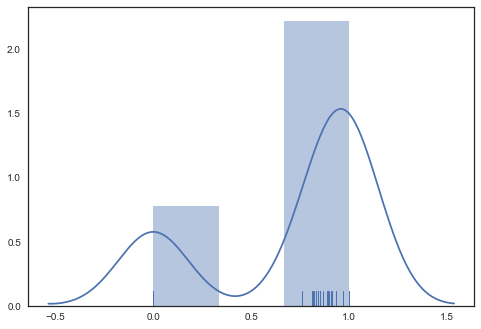

In [132]:
sns.distplot(clusterer.probabilities_, rug=True)

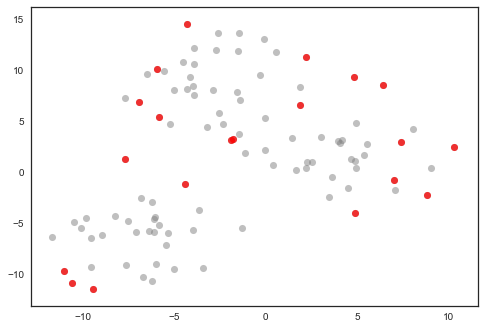

In [146]:
plt.scatter(X[:, 0], X[:, 1], s=50, lw=0, c='gray', alpha=0.5)
plt.scatter(X[outliers][:, 0],
            X[outliers][:, 1], s=50, lw=0, c='red', alpha=0.75)

In [135]:
set(clusterer.labels_)

{-1, 0, 1}

In [3]:
ids = 'b89 139 dch bvc pbr 1at 1dr 1fe br5 ek1'.split()
p4id = markings.ImageID(ids[0], scope='planet4')

In [4]:
p4id.plot_blotches(with_center=True)

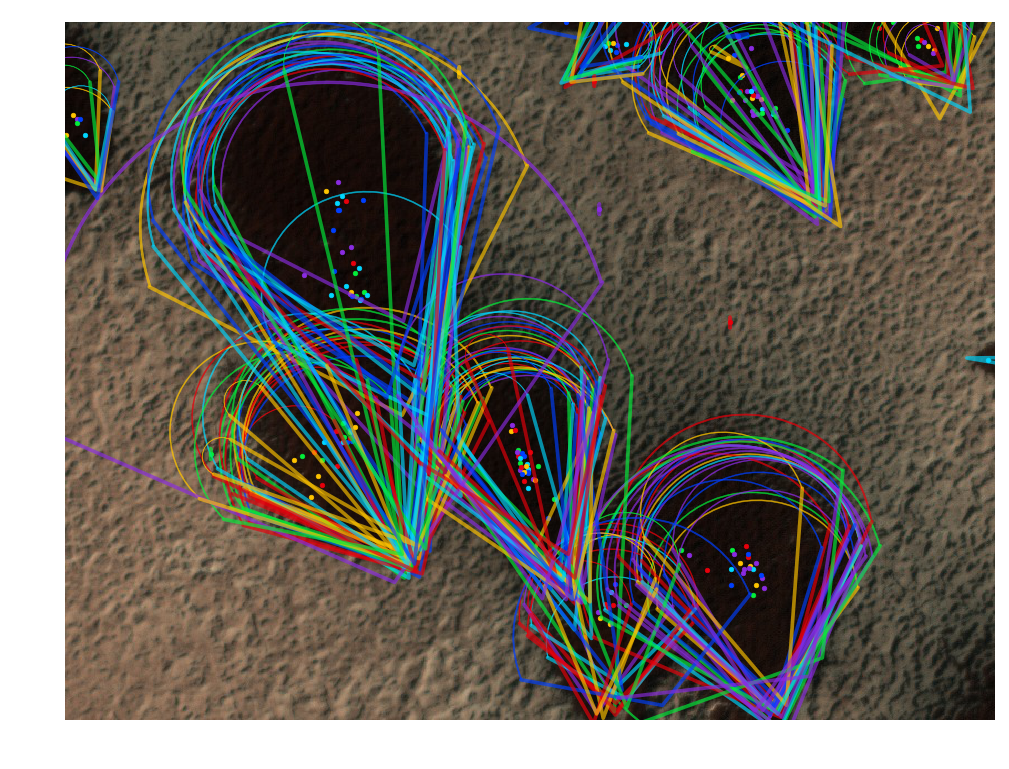

In [5]:
p4id.plot_fans(with_center=True)

In [7]:
import logging
logger = logging.getLogger('planet4.hdbscan')
logger.setLevel(logging.DEBUG)
ch = logging.StreamHandler()
logger.addHandler(ch)

In [5]:
from planet4.hdbscan import (HDBScanner, post_processing, 
                             parameter_scan, plot_results)
from hdbscan import HDBSCAN

In [6]:
basecols = 'x y'.split()
blotchcols = basecols + 'radius_1 radius_2'.split()
blotchcols_all = blotchcols + ['y_angle']
fancols = basecols + 'x_angle y_angle'.split()
fancols_all = fancols + 'spread'.split()

In [6]:
current_id = ids[0]
current_id
p4id = markings.ImageID(current_id, scope='planet4')

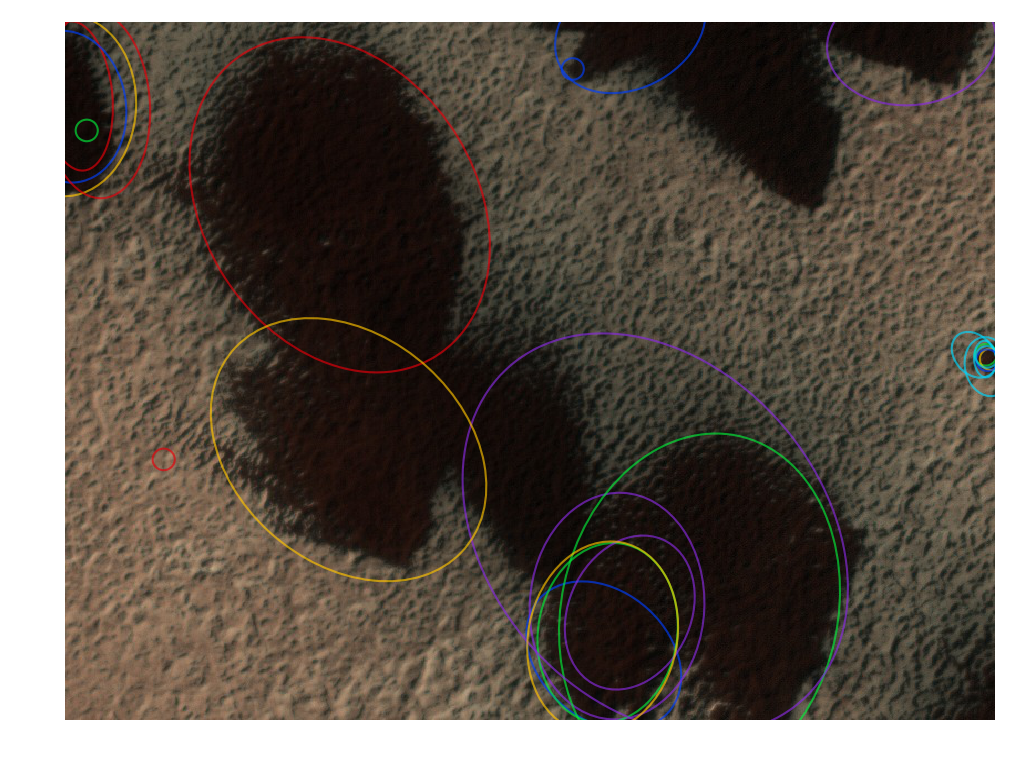

In [7]:
p4id.plot_blotches()

In [7]:
ids

['b89', '139', 'dch', 'bvc', 'pbr', '1at', '1dr', '1fe', 'br5', 'ek1']

In [11]:
for id_ in ids:
    for cols in [blotchcols_all]:
        for factor in [0.1, 0.15]:
            print(id_, cols, factor, scale)
            parameter_scan(id_, 'blotch',
                           cols=cols,
                           factor=factor)
            plt.close('all')

b89 ['x', 'y', 'radius_1', 'radius_2', 'y_angle'] 0.1 False
b89 ['x', 'y', 'radius_1', 'radius_2', 'y_angle'] 0.15 False
139 ['x', 'y', 'radius_1', 'radius_2', 'y_angle'] 0.1 False
139 ['x', 'y', 'radius_1', 'radius_2', 'y_angle'] 0.15 False
dch ['x', 'y', 'radius_1', 'radius_2', 'y_angle'] 0.1 False
dch ['x', 'y', 'radius_1', 'radius_2', 'y_angle'] 0.15 False
bvc ['x', 'y', 'radius_1', 'radius_2', 'y_angle'] 0.1 False
bvc ['x', 'y', 'radius_1', 'radius_2', 'y_angle'] 0.15 False
pbr ['x', 'y', 'radius_1', 'radius_2', 'y_angle'] 0.1 False
pbr ['x', 'y', 'radius_1', 'radius_2', 'y_angle'] 0.15 False
1at ['x', 'y', 'radius_1', 'radius_2', 'y_angle'] 0.1 False
1at ['x', 'y', 'radius_1', 'radius_2', 'y_angle'] 0.15 False
1dr ['x', 'y', 'radius_1', 'radius_2', 'y_angle'] 0.1 False
1dr ['x', 'y', 'radius_1', 'radius_2', 'y_angle'] 0.15 False
1fe ['x', 'y', 'radius_1', 'radius_2', 'y_angle'] 0.1 False
1fe ['x', 'y', 'radius_1', 'radius_2', 'y_angle'] 0.15 False
br5 ['x', 'y', 'radius_1', 'radi

In [ ]:
for id_ in ids:
    for cols in [fancols, fancols_all]:
        for core in [True, False]:
            for scale in [True,False]:
                print(id_, cols, core, scale)
                parameter_scan(id_, 'fan',
                               cols=cols,
                               only_core=core,
                               do_scale=scale)
                plt.close('all')

b89 ['x', 'y', 'x_angle', 'y_angle'] True True
b89 ['x', 'y', 'x_angle', 'y_angle'] True False


In [16]:
plt.figure()
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

NameError: name 'clusterer' is not defined

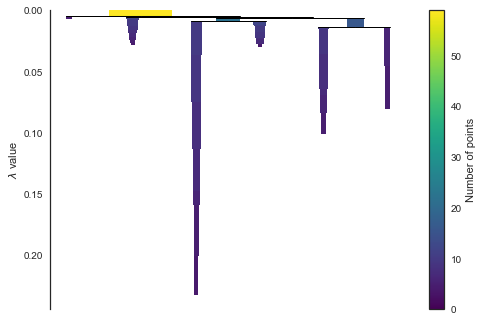

In [23]:
plt.figure()
clusterer.condensed_tree_.plot()

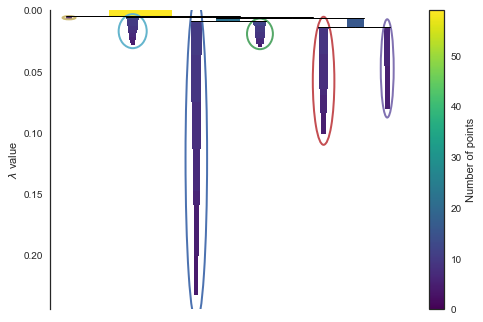

In [24]:
plt.figure()
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

In [148]:
from planet4.hdbscan import plot_results

In [ ]:
plot_results()

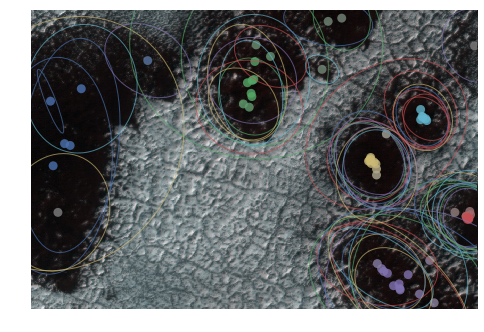

In [49]:
test_data = X.as_matrix()
fig, ax = plt.subplots()
imid.show_subframe(ax=ax)
ax.scatter(test_data.T[0], test_data.T[1], c=cluster_member_colors, **plot_kwds)
imid.plot_blotches(ax=ax)

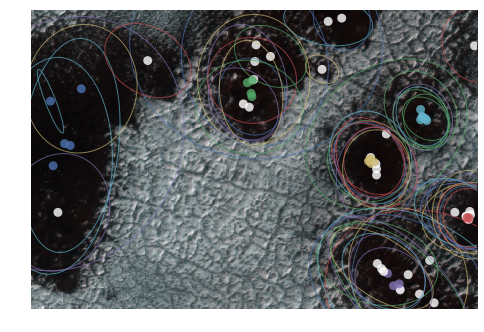

In [44]:
test_data = X.as_matrix()
fig, ax = plt.subplots()
imid.show_subframe(ax=ax)
ax.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)
imid.plot_blotches(ax=ax)

In [26]:
proba_cut=0.75

labels = clusterer.labels_
core_samples_mask = np.zeros_like(clusterer.labels_, dtype=bool)
core_samples_mask[clusterer.probabilities_ > proba_cut] = True
unique_labels = set(labels)
n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
reduced_data = []  # list of `kind` cluster average objects
n_rejected = 0

# loop over unique labels.
for label in unique_labels:
    # get indices for members of this cluster
    class_member_mask = (labels == label)
    cluster_members = (class_member_mask & core_samples_mask)
    # treat noise
    if label == -1:
        n_rejected = len(cluster_members)
    # if label is a cluster member:
    else:
        reduced_data.append(cluster_members)


In [27]:
from planet4 import markings
from scipy.stats import circmean

cols = markings.Fan.to_average
Marking = markings.Fan

data = fans

mean_markings = []
for cluster_members in reduced_data:
    clusterdata = data.loc[cluster_members, cols]
    meandata = clusterdata.mean()
    meandata.angle = np.rad2deg(
        circmean(
        np.deg2rad(
        clusterdata.angle)))
    cluster = Marking(meandata, scope='planet4')
    # storing n_members into the object for later.
    cluster.n_members = len(cluster_members)
    # storing this saved marker for later in ClusteringManager
    cluster.saved = False
    mean_markings.append(cluster)


In [26]:
mean_markings

[base: [ 368.   483.4]
 armlength: 60.46394682644806
 arm1: [ 324.98334441  440.90933976]
 arm2: [ 400.38108478  432.33774178], base: [ 430.32963392  463.92777846]
 armlength: 72.13719945416335
 arm1: [ 374.13636523  418.69402891]
 arm2: [ 458.213927    397.39777211], base: [ 502.904759    472.28571429]
 armlength: 48.26017249273475
 arm1: [ 474.40949863  433.33620356]
 arm2: [ 518.18050208  426.50694276], base: [ 441.19777629  444.86333313]
 armlength: 64.80054691720133
 arm1: [ 399.83083329  394.98461113]
 arm2: [ 467.69619577  385.7283634 ]]